# Mobile Price Classification Assignment
Build and evaluate multiple classifiers to predict the price_range of mobile phones from the given dataset.

## Task 0: Data Processing and EDA

In [28]:
#cell to import packages
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as sci
import os, time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt

In [2]:
#Loading data from the local system to the dataframe

os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # or however many cores your system has

df = pd.read_csv(r"C:\Data_Science\first_folder\mobile_dataset\train.csv")

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# checking the metadata of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
#checking the value description like count, mean, standard deviation, minimum, 25
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
# Values in the classified output cell
df["price_range"].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

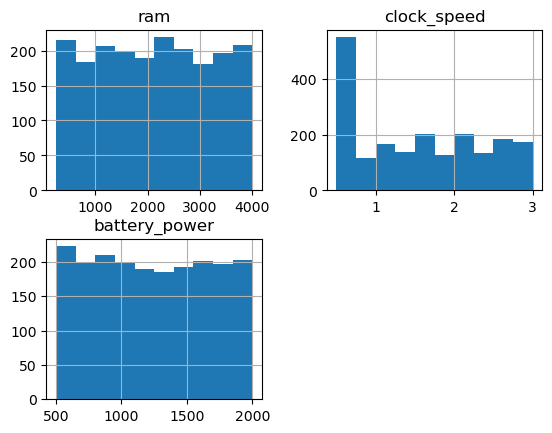

In [7]:
df.hist(column = ['ram','clock_speed','battery_power'])

plt.show()

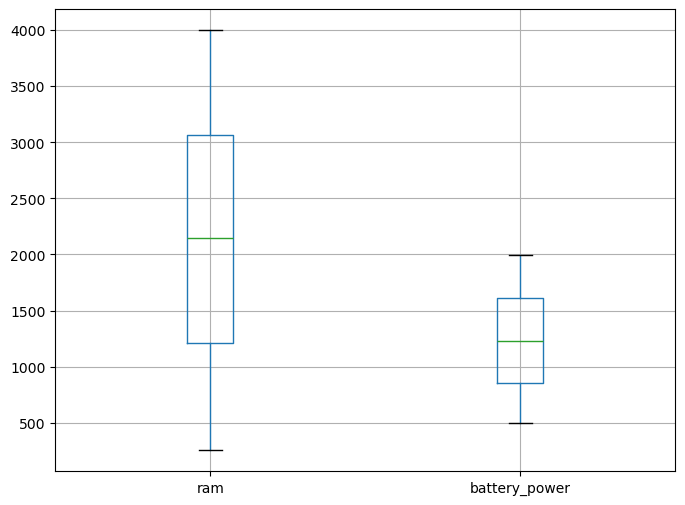

In [8]:
df.boxplot(column = ['ram','battery_power'], figsize = (8,6))

plt.show()

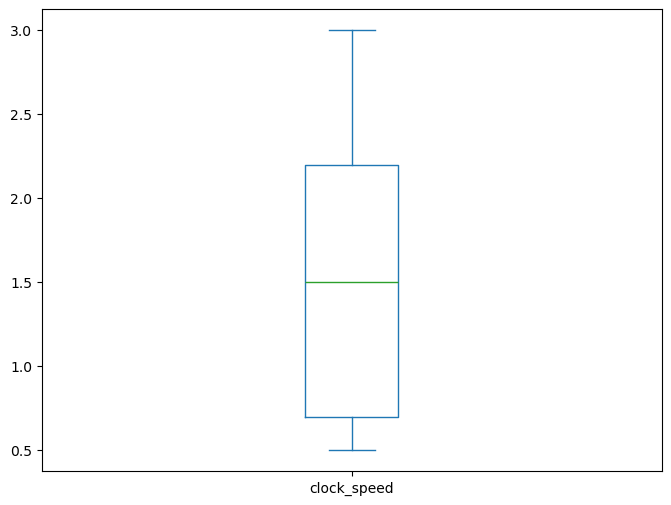

In [9]:
df['clock_speed'].plot.box(figsize = (8,6))

plt.show()

### Finding the relationship between features and target

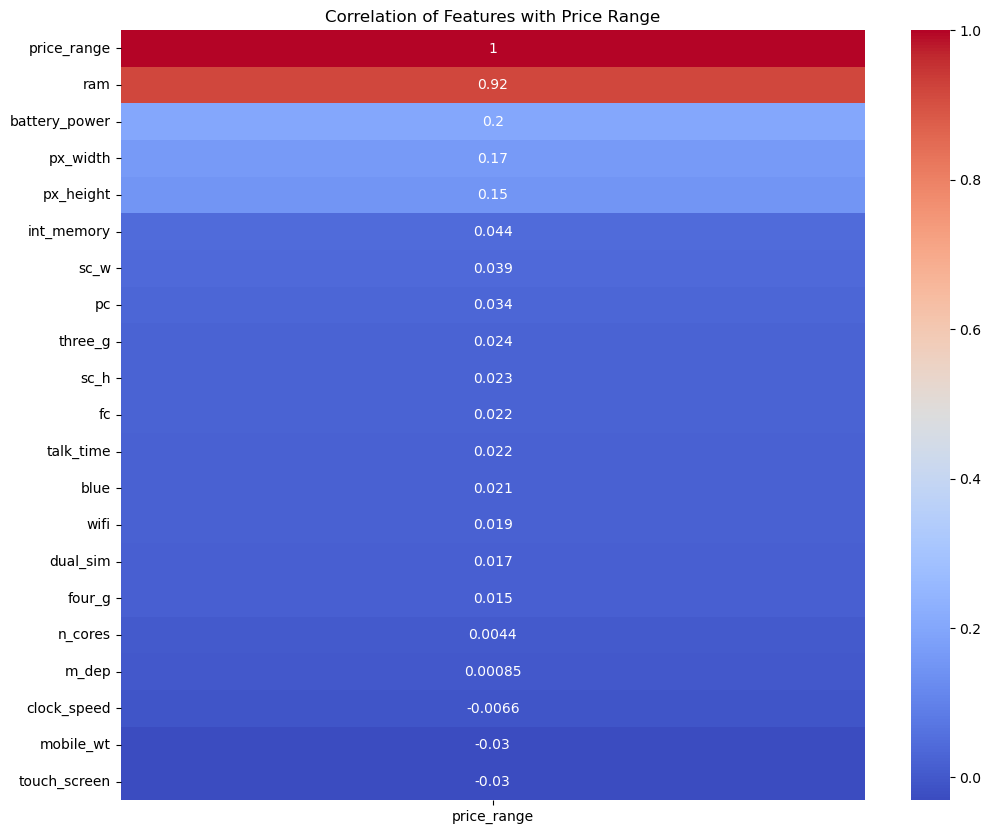

In [10]:
# Finding correlation between all features and target variable

correlations = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlations[['price_range']].sort_values(by='price_range', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Price Range")
plt.show()

Based on the above observation Ram and battery_power are the two variable which has more impact on the price_range values. So in the below cell finding the feature distribution among each range of values in price_range.

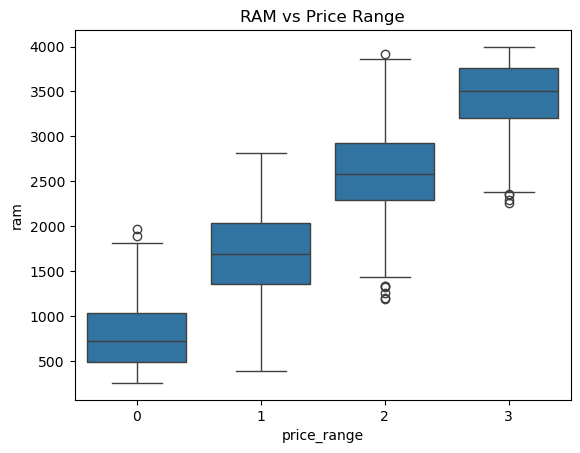

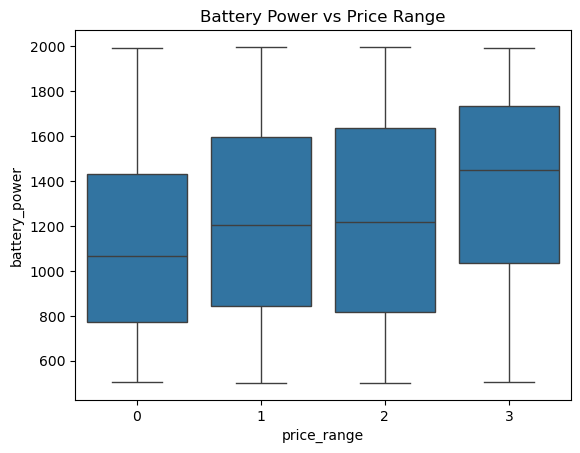

In [11]:
# Example: RAM
sns.boxplot(x='price_range', y='ram', data=df)
plt.title("RAM vs Price Range")
plt.show()

# Example: Battery Power
sns.boxplot(x='price_range', y='battery_power', data=df)
plt.title("Battery Power vs Price Range")
plt.show()

From the above graphs I can say that the clear shifts between medians with "ram" says it's strongly predictive quality for the price range. Even though there are some outliers with the "ram" it's a strong trend to target variable where as "battery_power" here can be consider as a usable feature for the price_range.

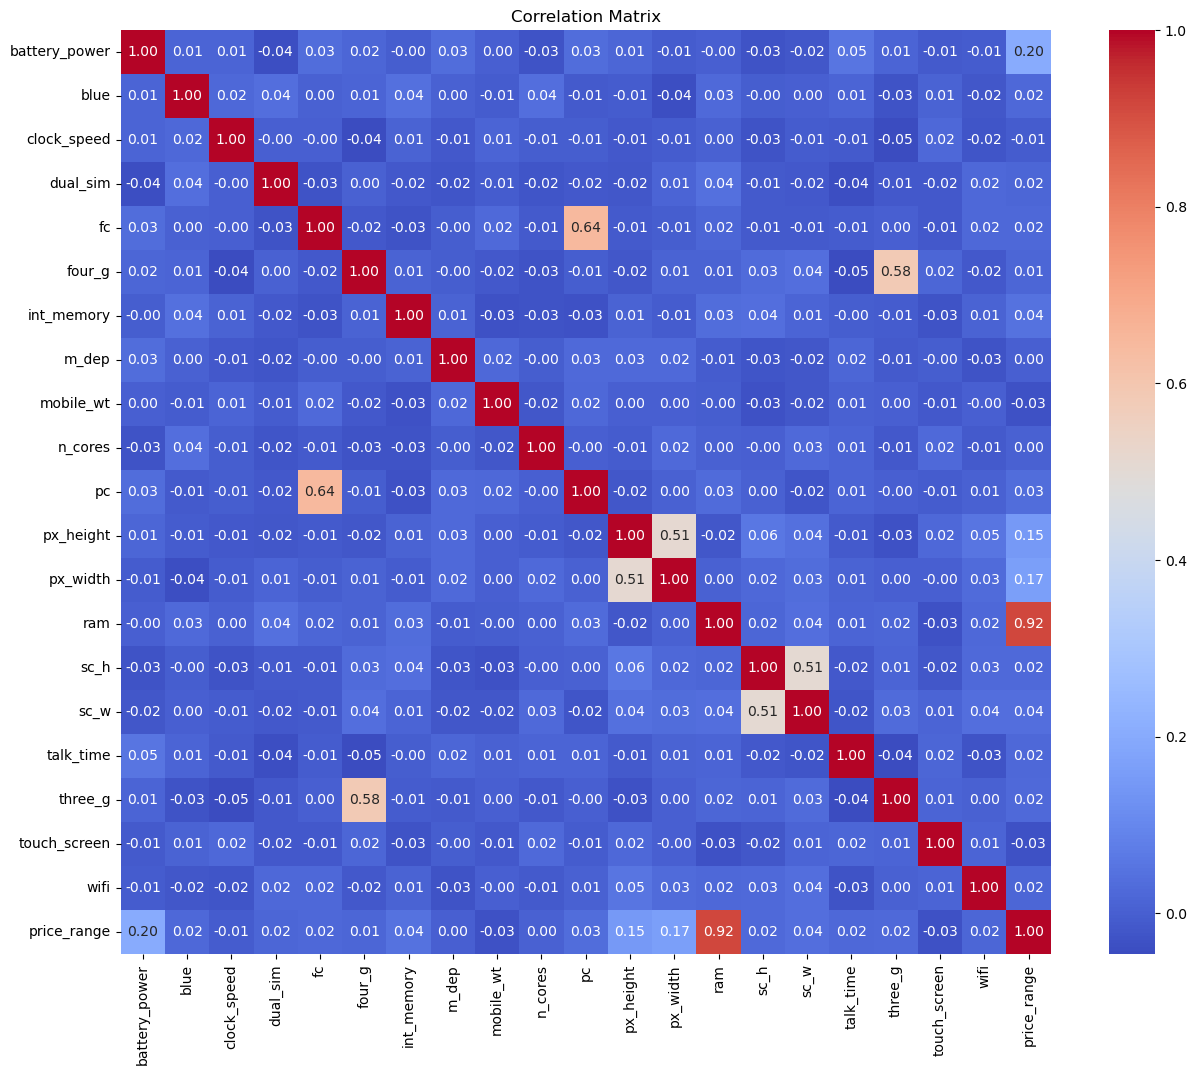

In [12]:
# To find correlated features

plt.figure(figsize=(15, 12))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Based on the above graph I can say that the most correlated features are fc and pc where I can take average of the two columns as one column other than the "ram" with "target"

In [13]:
# Get the absolute value of correlations
corr = df.corr().abs()

# Only look at the upper triangle of the matrix (to avoid duplicates)
upper = corr.where(~np.tril(np.ones(corr.shape)).astype(bool))

# Find features with correlation > 0.8
high_corr = [column for column in upper.columns if any(upper[column] > 0.8)]

print("Highly correlated features:", high_corr)

Highly correlated features: ['price_range']


# Task 1 Explore Classification Metrics

## Confusion Matrix

For binary classification, the confusion matrix looks like this

                 |   Predicted Positive  |   Predicted Negative
Actual Positive  |   TP (True Positive)  |   FN (False Negative)

Actual Negative  |   FP (False Positive) |  TN (True Negative)

For multiclass, it extends to a square matrix of shape n_classes * n_classes

## Accuracy


Accuracy is a default evaluation criterion for the problem that are designed to solve which is an "Estimator Score Method" for classifiers.
Function: metrics.accuracy_score

This function computes subset accuracy: Set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

Says the proportion of total correct predictions
Accuracy = (TP + TN)/(TP + FP + TN + FN)

## Precision

Precision = TP/(TP + FP)
Of all predicted positives, how many were actually correct.
Useful when false positives are costly. (EG: spam detection)

## Recall

Recall = TP / (TP + FN)

Of all actuall positives how many did we correctly predicted. Useful when false negatives are more serious. (Disease Detection)

## F1 Score

F1 Score = 2 * ((Precision * Recall) / (Precision + Recall))

Harmonic Mean of precision and recall balances both.

# Task 2: Train and Evaluate Models

## Logistic Regression Classification Model

In [14]:
X = df.drop("price_range", axis=1) # Features
y = df["price_range"] # Target

#scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# Train logistic regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [16]:
# Predict on validation set
y_pred = model.predict(X_val)

In [17]:
# Evaluation
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

Accuracy: 0.9775
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.95      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



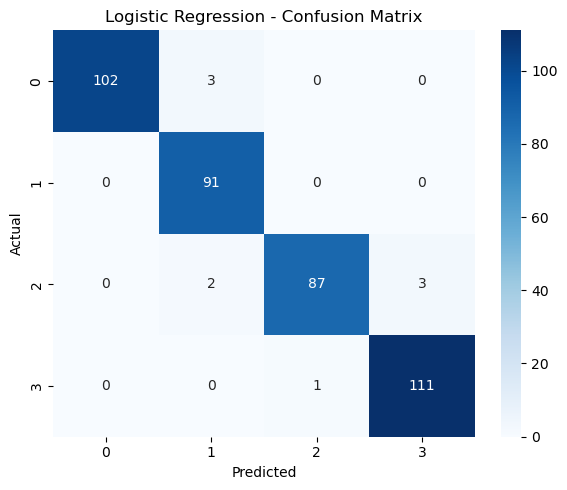

In [18]:
# Print results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# KNN Classification Model

Best parameters: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
Accuracy: 0.6400
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.77       105
           1       0.49      0.46      0.47        91
           2       0.48      0.58      0.52        92
           3       0.82      0.71      0.76       112

    accuracy                           0.64       400
   macro avg       0.64      0.63      0.63       400
weighted avg       0.65      0.64      0.64       400



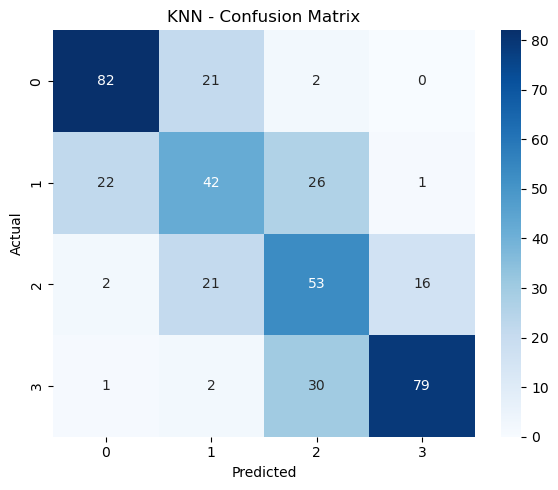

In [19]:
param_grid = {
    'n_neighbors': list(range(1, 21)),  # trying k from 1 to 20
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model
best_knn = grid.best_estimator_
print("Best parameters:", grid.best_params_)

# Predict on validation set
y_pred = best_knn.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Decision Tree Model

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy: 0.8525
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       105
           1       0.77      0.87      0.81        91
           2       0.78      0.78      0.78        92
           3       0.92      0.87      0.89       112

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



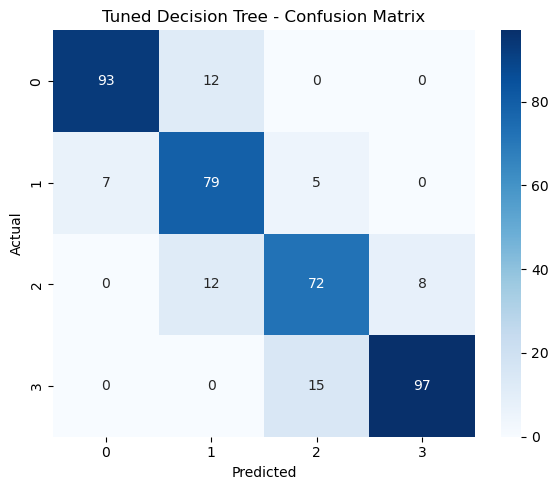

In [20]:
# Set up hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Get best model
best_tree = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Predict on validation set
y_pred = best_tree.predict(X_val)

# Evaluate
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Tuned Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Support Vector Machine

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9725
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       105
           1       0.92      1.00      0.96        91
           2       0.99      0.96      0.97        92
           3       0.98      0.99      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



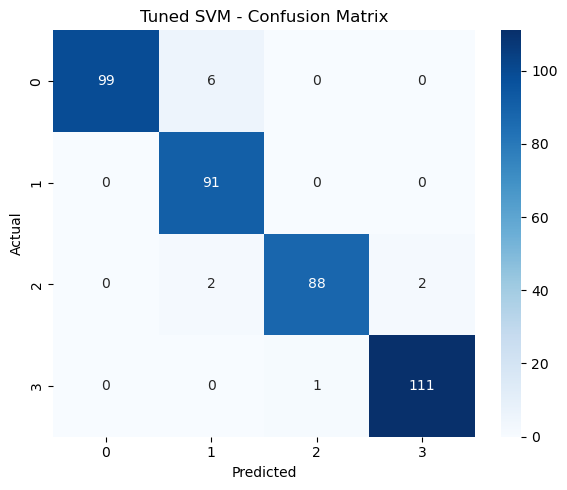

In [21]:
# Set up hyperparameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model
best_svm = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Predict and evaluate
y_pred = best_svm.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Tuned SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Random Forest

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8925
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       105
           1       0.88      0.86      0.87        91
           2       0.79      0.87      0.83        92
           3       0.94      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



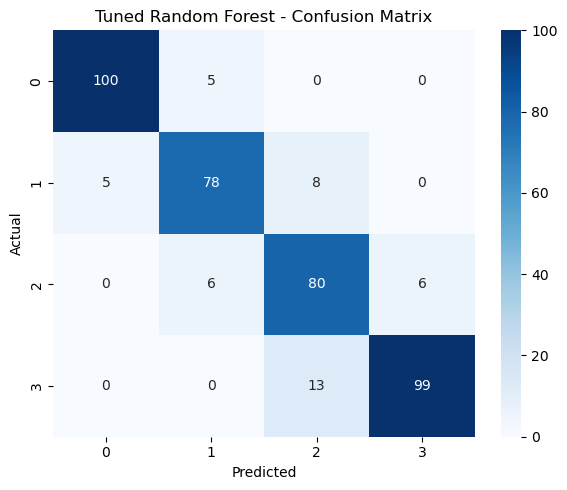

In [22]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model
best_rf = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Predictions and evaluation
y_pred = best_rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Tuned Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Adaboost

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Accuracy: 0.7450
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       105
           1       0.67      0.70      0.69        91
           2       0.62      0.52      0.56        92
           3       0.77      0.86      0.81       112

    accuracy                           0.74       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.74      0.74      0.74       400



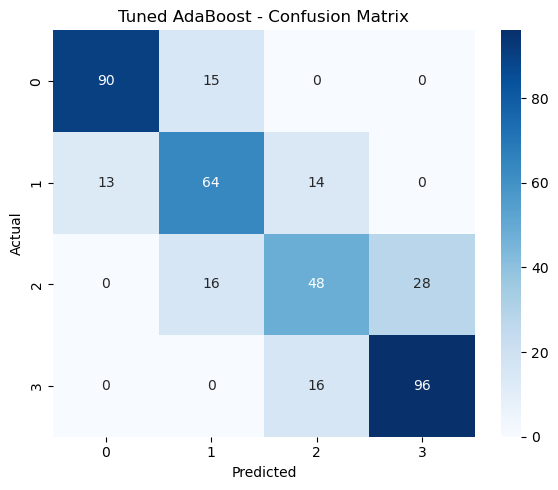

In [23]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Initialize GridSearchCV
grid = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model
best_ada = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Make predictions
y_pred = best_ada.predict(X_val)

# Evaluate model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Tuned AdaBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# XGBoost

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.9100
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       105
           1       0.87      0.95      0.91        91
           2       0.88      0.84      0.86        92
           3       0.93      0.91      0.92       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



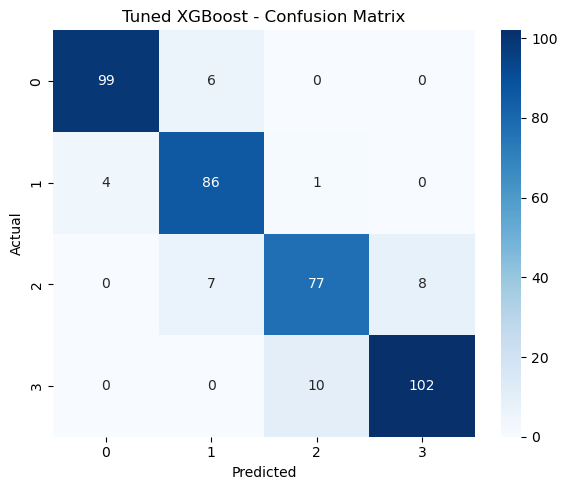

In [26]:
# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# GridSearchCV setup
grid = GridSearchCV(XGBClassifier(eval_metric='mlogloss', random_state=42),
                    param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model from grid
best_xgb = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Make predictions
y_pred = best_xgb.predict(X_val)

# Evaluate model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Tuned XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Comparing all 7 models

In [30]:
# Store results
results = []

# Define models with tuned/best-known hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C=1, solver='lbfgs', max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1, criterion='entropy', random_state=42),
    "SVM": SVC(kernel='rbf', C=10, gamma='scale'),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, criterion='entropy', random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', n_estimators=100, max_depth=5, learning_rate=0.1, subsample=1.0, random_state=42)
}

# Run and evaluate each model
for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    end = time.time()

    report = classification_report(y_val, y_pred, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_val, y_pred),
        "Precision (Macro)": report['macro avg']['precision'],
        "Recall (Macro)": report['macro avg']['recall'],
        "F1-Score (Macro)": report['macro avg']['f1-score'],
        "Time (s)": round(end - start, 3)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Display
print("\nModel Comparison Summary:\n")
print(results_df)


Model Comparison Summary:

                 Model  Accuracy  Precision (Macro)  Recall (Macro)  \
0  Logistic Regression    0.9775           0.977559        0.977038   
1              XGBoost    0.9075           0.905338        0.905633   
2                  SVM    0.9000           0.896191        0.895212   
3        Random Forest    0.8850           0.880829        0.881087   
4        Decision Tree    0.8450           0.845503        0.842855   
5             AdaBoost    0.7450           0.734262        0.734830   
6                  KNN    0.5775           0.579613        0.569245   

   F1-Score (Macro)  Time (s)  
0          0.976934     0.025  
1          0.904882     0.435  
2          0.895242     0.313  
3          0.880864     1.522  
4          0.842102     0.048  
5          0.732955     0.571  
6          0.572965     0.064  


Comparing all the models considering the best model as Logistic regression classification model

# Task 3: Predict Price Category for a Specific Row

In [ ]:
# Define label mapping
label_map = {0: "Low", 1: "Medium", 2: "High", 3: "Very High"}

# Change this to any row index from your validation set
row_index = 42

# Select the row from validation set
sample = X_val[row_index].reshape(1, -1)

# Predict using the trained logistic regression model
predicted_class = best_logistic_model.predict(sample)[0]

# Convert prediction to readable form
predicted_label = label_map[predicted_class]

# Print result
print(f"Predicted Price Range for row {row_index}: {predicted_label}")

In [34]:
# Load training data
train_df = pd.read_csv(r"C:\Data_Science\first_folder\mobile_dataset\train.csv")
X = train_df.drop("price_range", axis=1)
y = train_df["price_range"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(C=1, solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Load new test data (separate file)
test_df = pd.read_csv(r"C:\Data_Science\first_folder\mobile_dataset\test.csv")
X_test_scaled = scaler.transform(test_df)

row_index = 42  # Change this to test another row
sample = X_test_scaled[row_index].reshape(1, -1)

# Predict using trained model
predicted_class = model.predict(sample)[0]

# Convert to readable output
label_map = {0: "Low", 1: "Medium", 2: "High", 3: "Very High"}
predicted_label = label_map[predicted_class]

# Output result
print(f"Predicted Price Range for row {row_index}: {predicted_label}")

Predicted Price Range for row 42: Low
